# 단어 임베딩

In [1]:
## Embedding 층 생성

from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)  # 1000개토큰 + 64임베딩차원

Using TensorFlow backend.


In [2]:
## Embedding 층에 사용할 IMBD 데이터 로드

from keras.datasets import imdb
from keras import preprocessing

max_features = 1000  # 특성으로 사용할 단어수
max_len = 20  # 사용할 텍스트의 길이

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)  # 정수리스트로 데이터로드

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

print(x_train)
print(x_test)

[[ 65  16  38 ...  19 178  32]
 [ 23   4   2 ...  16 145  95]
 [  2  13 191 ...   7 129 113]
 ...
 [ 11   2   2 ...   4   2   2]
 [ 92 401 728 ...  12   9  23]
 [764  40   4 ... 204 131   9]]
[[286 170   8 ...  14   6 717]
 [ 10  10 472 ... 125   4   2]
 [ 34   2  45 ...   9  57 975]
 ...
 [226  20 272 ...  21 846   2]
 [ 55 117 212 ...   2   7 470]
 [ 19  14  20 ...  34   2   2]]


In [3]:
## IMDB 데이터에 Embedding 층과 분류기 적용

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()

model.add(Embedding(10000, 8, input_length=max_len))  # 입력데이터를 Flatten 층에서 펼치기위해 input_length 를 지정함
model.add(Flatten())  # 3D 임베딩 텐서를 (samples, maxlen*8) 크기의 2D 텐서로 펼침
model.add(Dense(1, activation='sigmoid'))  # 분류기 추가

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 81us/step - loss: 0.6772 - acc: 0.6006 - val_loss: 0.6448 - val_acc: 0.6704
Epoch 2/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.5830 - acc: 0.7

In [4]:
print(history.history)

{'val_loss': [0.6448309545516968, 0.5628908987998963, 0.5361583267211915, 0.5299184844970704, 0.5290373926162719, 0.5316559975624084, 0.5333293436050415, 0.5377060159683228, 0.5421561880111694, 0.545794453907013], 'val_acc': [0.6704, 0.7046, 0.7208, 0.7292, 0.7334, 0.7344, 0.7318, 0.7288, 0.7276, 0.729], 'loss': [0.677172270488739, 0.5829987959384918, 0.5152153789043427, 0.4878621250152588, 0.47306839122772215, 0.46327627944946287, 0.4548164222717285, 0.4470846856117249, 0.43988133943080904, 0.4327883995294571], 'acc': [0.60065, 0.71875, 0.7464, 0.76065, 0.7694, 0.77735, 0.78185, 0.7869, 0.7924, 0.79585]}


In [5]:
## IMDB 원본 데이터 전처리

import os

imdb_dir = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

print( len(labels) )
print( len(texts) )

25000
25000


In [6]:
## 데이터 토크나이징

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버림
training_samples = 20  # 훈련샘플 200개
validation_samples = 10000  # 검증샘플 1만개
max_words = 10000  # 데이터세트에서 최고빈도 단어 1만개

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s 개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기 : ', data.shape)
print('레이블 텐서의 크기 : ', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(x_train)
print(y_train)
print(x_val)
print(y_val)

88582 개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기 :  (25000, 100)
레이블 텐서의 크기 :  (25000,)
[[  11  387   40 ...  387    5  647]
 [  15   65  552 ...  310   39   21]
 [  28   26    6 ...    2 1110  136]
 ...
 [ 423  103    7 ... 1597   12  122]
 [   9   10   67 ...  152 1558 5193]
 [  42  404  139 ...  302    4 2647]]
[1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1]
[[ 633  717   10 ...  287 4880  342]
 [   1 1053   66 ...  415    4 4061]
 [ 900  390    1 ...  355    1  718]
 ...
 [  59   27   37 ...   10   25 1044]
 [   0    0    0 ...  146   11   19]
 [1751 2090    4 ... 1840  339  155]]
[0 0 1 ... 0 0 0]


In [7]:
## GloVe 단어 임베딩 파일 파싱

glove_dir = './datasets/glove.6B/'

embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')  # 사전 계산된 단어 임베딩
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [8]:
## GloVe 단어 임베딩 행렬 준비

embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:  # 임베딩 인덱스에 없는 단어는 모두 0
            embedding_matrix[i] = embedding_vector

print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 [-0.071953    0.23127     0.023731   ... -0.71894997  0.86894
   0.19539   ]
 ...
 [ 0.13787    -0.17727    -0.62436002 ...  0.35506001  0.33443999
   0.14436001]
 [-0.88968998  0.55208999 -0.50498998 ... -0.54351002 -0.21874
   0.51186001]
 [-0.17381001 -0.037609    0.068837   ... -0.097167    1.08840001
   0.22676   ]]


In [9]:
## 모델 정의

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [10]:
## 사전 훈련된 단어 임베딩을 Embedding 층에 로드

model.layers[0].set_weights([embedding_matrix])  # Embedding 층 가중치에 단어임베딩 적용
model.layers[0].trainable = False  # Embedding 층 동결

In [11]:
## 훈련과 평가

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')  # 훈련결과 저장

Train on 20 samples, validate on 10000 samples
Epoch 1/10
20/20 [==============================] - 1s 47ms/step - loss: 0.9443 - acc: 0.4000 - val_loss: 4.7991 - val_acc: 0.4932
Epoch 2/10
20/20 [==============================] - 0s 23ms/step - loss: 3.2233 - acc: 0.5500 - val_loss: 1.1959 - val_acc: 0.5066
Epoch 3/10
20/20 [==============================] - 0s 24ms/step - loss: 0.3350 - acc: 0.8500 - val_loss: 0.7773 - val_acc: 0.4937
Epoch 4/10
20/20 [==============================] - 0s 25ms/step - loss: 0.1623 - acc: 0.9000 - val_loss: 0.7176 - val_acc: 0.5034
Epoch 5/10
20/20 [==============================] - 0s 25ms/step - loss: 0.1238 - acc: 0.9500 - val_loss: 0.7062 - val_acc: 0.5072
Epoch 6/10
20/20 [==============================] - 0s 24ms/step - loss: 0.0702 - acc: 1.0000 - val_loss: 0.7322 - val_acc: 0.5195
Epoch 7/10
20/20 [==============================] - 0s 24ms/step - loss: 0.0334 - acc: 1.0000 - val_loss: 0.7428 - val_acc: 0.5198
Epoch 8/10
20/20 [==================

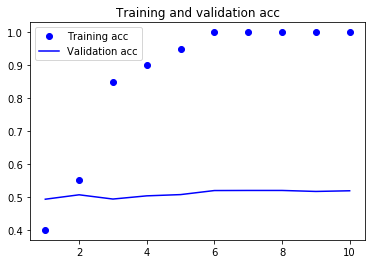

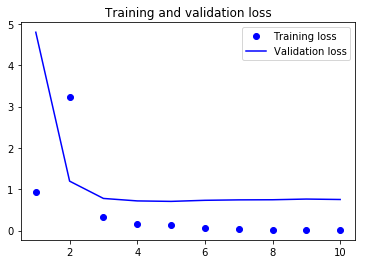

In [12]:
## 훈련 결과 그래프

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 20 samples, validate on 10000 samples
Epoch 1/10
20/20 [==============================] - 1s 55ms/step - loss: 0.6954 - acc: 0.3500 - val_loss: 0.6927 - val_acc: 0.5152
Epoch 2/10
20/20 [==============================] - 0s 23ms/step - loss: 0.4924 - acc:

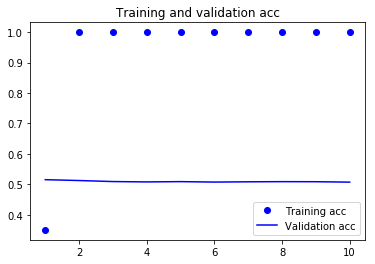

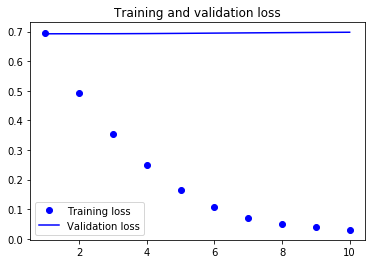

In [13]:
## 사전훈련된 단어임베딩 없이 같은 모델 훈련

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
## 테스트 데이터 토큰화

test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

print(x_test)
print(y_test)

[[ 300   31   60 ...   32  531    8]
 [5742   44   87 ...  176  467  155]
 [1449  140 5948 ...    8    1  174]
 ...
 [   4 1021    2 ...   34  314   38]
 [   1  169  400 ...   28 1156 5894]
 [   5 4987   43 ...   58  104 3194]]
[0 0 0 ... 1 1 1]


In [15]:
## 테스트세트에서 모델 평가

model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 58us/step


[0.7540054191970825, 0.51356]